# Pull Alpaca API data for ARKK holdings

In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from datetime import datetime, timedelta
import numpy as np
from mcforecast import MCSimulation
import panel as pn
from panel.interact import interact
pn.extension
from ipywidgets import interact
import matplotlib.pyplot as plt

In [2]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
print(alpaca)

## ARK ETF - Alpaca Data Pull

In [6]:
ARK_ETF = ["TSLA", "ROKU", "TDOC", "MSTR", "SQ", "SHOP", "TTWO", "TWLO", "SPOT", "NTLA", "CRSP", "EXAS", "Z", "TWTR", "TER", "DOCU", "CGEN"]

In [7]:
timeframe = "1D"

In [8]:
start_date = pd.Timestamp("2018-09-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-01", tz="America/New_York").isoformat()

In [9]:
ARK_ETF_portfolio = alpaca.get_barset(
    ARK_ETF,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

In [10]:
ARK_ETF_portfolio.head()

CGEN                               CRSP         \
                           open  high   low close    volume   open   high   
time                                                                        
2018-09-04 00:00:00-04:00  3.90  4.00  3.75  3.90  117029.0  58.50  59.00   
2018-09-05 00:00:00-04:00  3.80  3.95  3.80  3.95  115535.0  55.50  55.50   
2018-09-06 00:00:00-04:00  3.90  3.95  3.65  3.95  200494.0  53.17  53.72   
2018-09-07 00:00:00-04:00  3.95  3.95  3.75  3.85  176952.0  50.00  51.73   
2018-09-10 00:00:00-04:00  3.95  4.00  3.85  3.95  159873.0  50.66  50.85   

                                                   ...   TWTR          \
                              low  close   volume  ...   open    high   
time                                               ...                  
2018-09-04 00:00:00-04:00  53.600  55.50  1032358  ...  34.75  35.125   
2018-09-05 00:00:00-04:00  52.005  53.44   606929  ...  34.65  34.700   
2018-09-06 00:00:00-04:00  49.580  49.84   558842  ...  32.86  32.950   
2018-09-07 00:00:00-04:00  49.360  50.12   431793  ...  30.31  31.390   
2018-09-10 00:00:00-04:00  47.500  49.67  1106214  ...  30.50  30.600   

                                                           Z                 \
                               low  close      volume   open    high    low   
time                                                                          
2018-09-04 00:00:00-04:00  34.4800  34.84  12200652.0  48.55  48.900  47.56   
2018-09-05 00:00:00-04:00  32.5100  32.73  32198973.0  47.82  48.270  46.91   
2018-09-06 00:00:00-04:00  30.6200  30.82  33189835.0  47.68  47.980  43.87   
2018-09-07 00:00:00-04:00  29.8200  30.49  28893185.0  44.58  46.115  44.52   
2018-09-10 00:00:00-04:00  29.9531  30.54  15451664.0  45.00  46.200  44.60   

                                           
                           close   volume  
time                                       
2018-09-04 00:00:00-04:00  47.72  1177704  
2018-09-05 00:00:00-04:00  47.67  1171127  
2018-09-06 00:00:00-04:00  44.62  2537771  
2018-09-07 00:00:00-04:00  44.93  1830479  
2018-09-10 00:00:00-04:00  46.12  1103775  

[5 rows x 85 columns]

In [11]:
# adding a daily returns column for ARK ETF
ARK_closing_prices = pd.DataFrame()

# Fetch the closing prices of ARK etf stocks
ARK_closing_prices["TSLA"] = ARK_ETF_portfolio["TSLA"]["close"]
ARK_closing_prices["ROKU"] = ARK_ETF_portfolio["ROKU"]["close"]
ARK_closing_prices["TDOC"] = ARK_ETF_portfolio["TDOC"]["close"]
ARK_closing_prices["MSTR"] = ARK_ETF_portfolio["MSTR"]["close"]
ARK_closing_prices["SQ"] = ARK_ETF_portfolio["SQ"]["close"]
ARK_closing_prices["SHOP"] = ARK_ETF_portfolio["SHOP"]["close"]
ARK_closing_prices["TTWO"] = ARK_ETF_portfolio["TTWO"]["close"]
ARK_closing_prices["TWLO"] = ARK_ETF_portfolio["TWLO"]["close"]
ARK_closing_prices["SPOT"] = ARK_ETF_portfolio["SPOT"]["close"]
ARK_closing_prices["NTLA"] = ARK_ETF_portfolio["NTLA"]["close"]
ARK_closing_prices["CRSP"] = ARK_ETF_portfolio["CRSP"]["close"]
ARK_closing_prices["EXAS"] = ARK_ETF_portfolio["EXAS"]["close"]
ARK_closing_prices["Z"] = ARK_ETF_portfolio["Z"]["close"]
ARK_closing_prices["TWTR"] = ARK_ETF_portfolio["TWTR"]["close"]
ARK_closing_prices["TER"] = ARK_ETF_portfolio["TER"]["close"]
ARK_closing_prices["DOCU"] = ARK_ETF_portfolio["DOCU"]["close"]
ARK_closing_prices["CGEN"] = ARK_ETF_portfolio["CGEN"]["close"]


# Drop the time component of the date
ARK_closing_prices.index = ARK_closing_prices.index.date

# Compute daily returns
ARK_daily_returns = ARK_closing_prices.pct_change().dropna()

# Display sample data
ARK_daily_returns.head(10)

,TSLA,ROKU,TDOC,MSTR,SQ,SHOP,TTWO,TWLO,SPOT,NTLA,CRSP,EXAS,Z,TWTR,TER,DOCU,CGEN
2018-09-05,-0.028691,-0.029123,-0.022756,-0.019695,-0.044603,-0.043463,-0.041921,-0.061775,-0.054018,-0.022446,-0.037117,-0.023322,-0.001048,-0.060563,-0.007280,-0.026084,0.012821
2018-09-06,0.001107,0.036844,-0.010996,-0.000207,0.015600,-0.041795,0.011249,-0.014931,-0.010879,-0.099501,-0.067365,-0.010026,-0.063982,-0.058356,-0.032022,-0.083360,0.000000
2018-09-07,-0.063235,0.025314,0.007848,0.000069,0.016038,0.048688,0.001534,0.022860,0.014190,0.006282,0.005618,0.029051,0.006948,-0.010707,0.002778,-0.015387,-0.025316
2018-09-10,0.084410,0.053719,0.001622,0.013948,-0.006336,0.010523,-0.010647,0.024050,0.025399,-0.008814,-0.008978,-0.015929,0.026486,0.001640,-0.006547,-0.053029,0.025974
2018-09-11,-0.021124,0.032992,0.012634,0.008308,0.032330,0.039401,0.036931,0.011624,0.000329,0.080030,0.043286,-0.001053,0.021899,0.011624,-0.022814,0.000742,-0.012658
2018-09-12,0.039831,-0.000141,-0.015355,0.006214,-0.019939,0.036756,-0.003509,-0.003283,0.006464,0.038079,0.036858,-0.006192,0.008487,-0.037061,-0.048249,0.059848,-0.025641
2018-09-13,-0.003923,-0.005147,0.010396,-0.006914,-0.002543,0.015474,0.021355,0.003411,0.005661,0.023794,0.008189,0.017630,-0.019777,0.021176,0.019624,-0.031643,0.026316
2018-09-14,0.019660,0.007298,-0.005788,0.007165,0.006651,-0.004887,-0.016140,0.023212,-0.022407,0.002260,0.021599,-0.006383,-0.000859,-0.008558,0.003742,-0.029247,0.000000
2018-09-17,-0.001084,-0.019263,-0.034929,-0.012818,-0.043497,-0.007366,-0.019611,-0.032310,-0.029897,-0.038647,-0.090658,-0.038804,-0.049409,-0.041999,-0.008788,-0.029570,-0.025641
2018-09-18,-0.033448,0.033262,0.031501,0.019035,0.012779,0.056304,0.008975,0.011011,0.001541,0.071357,0.056575,-0.007638,0.008814,0.012649,0.006985,0.018015,0.006579


In [12]:
#Calculating cumilative returns for ARK
ARK_cum_returns = (1+ ARK_daily_returns).cumprod()
ARK_cum_returns.head()

,TSLA,ROKU,TDOC,MSTR,SQ,SHOP,TTWO,TWLO,SPOT,NTLA,CRSP,EXAS,Z,TWTR,TER,DOCU,CGEN
2018-09-05,0.971309,0.970877,0.977244,0.980305,0.955397,0.956537,0.958079,0.938225,0.945982,0.977554,0.962883,0.976678,0.998952,0.939437,0.992720,0.973916,1.012821
2018-09-06,0.972385,1.006648,0.966498,0.980102,0.970301,0.916558,0.968857,0.924216,0.935690,0.880286,0.898018,0.966886,0.935038,0.884615,0.960932,0.892730,1.012821
2018-09-07,0.910897,1.032130,0.974083,0.980169,0.985863,0.961184,0.970343,0.945344,0.948968,0.885817,0.903063,0.994975,0.941534,0.875144,0.963601,0.878994,0.987179
2018-09-10,0.987785,1.087575,0.975664,0.993841,0.979616,0.971298,0.960012,0.968079,0.973071,0.878009,0.894955,0.979126,0.966471,0.876579,0.957292,0.832382,1.012821
2018-09-11,0.966919,1.123457,0.987990,1.002098,1.011288,1.009567,0.995466,0.979332,0.973391,0.948276,0.933694,0.978096,0.987636,0.886768,0.935453,0.832999,1.000000


In [13]:
#calculate ARK avg returns
ARK_avg_returns = ARK_daily_returns.mean() * 252
ARK_avg_returns.head()

TSLA    0.784559
ROKU    0.932080
TDOC    0.397589
MSTR    0.721981
SQ      0.528540
dtype: float64

In [14]:
#calculate standard deviation of ARK
ARK_Std_Deviation = ARK_daily_returns.std()
ARK_Std_Deviation.head()

TSLA    0.052195
ROKU    0.046712
TDOC    0.037817
MSTR    0.042713
SQ      0.037968
dtype: float64

In [15]:
#ARK Annual STD
ARK_Annual_STD = ARK_Std_Deviation * np.sqrt(252)
ARK_Annual_STD.head()

TSLA    0.828566
ROKU    0.741525
TDOC    0.600329
MSTR    0.678055
SQ      0.602726
dtype: float64

In [16]:
#Calculating Sharpe Ratio: Helps quanitfy both risk & potential return of an investment
ARK_Sharpe_Ratio = ARK_avg_returns / ARK_Annual_STD
ARK_Sharpe_Ratio.sort_values()

SPOT    0.379425
TTWO    0.421521
EXAS    0.482364
CGEN    0.631598
TDOC    0.662286
TWTR    0.722355
CRSP    0.732224
Z       0.750323
SQ      0.876917
TSLA    0.946887
NTLA    1.030470
MSTR    1.064783
TER     1.074286
TWLO    1.097571
DOCU    1.244727
ROKU    1.256978
SHOP    1.691027
dtype: float64

In [17]:
## saving ARK_ETF_portfolio to csv
ARK_ETF_portfolio.to_csv("Ark_ETF.csv")

In [18]:
## saving ARK daily returns to a csv
ARK_daily_returns.to_csv("ARK_daily_returns.csv")

### Competitors - Alpaca Data Pull

In [19]:
competitors_df = ["NIO", "NFLX", "PFE", "MSFT", "V", "PYPL", "CRM", "ATVI", "VG", "TTD", "IONS", "NVAX", "AMGN", "RDFN", "SNAP"]

In [20]:
timeframe = "1D"

In [21]:
start_date = pd.Timestamp("2018-09-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-01", tz="America/New_York").isoformat()

In [22]:
competitors_list = alpaca.get_barset(
    competitors_df,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

In [23]:
competitors_list.head()

AMGN                                      ATVI  \
                             open    high       low   close   volume   open   
time                                                                          
2018-09-04 00:00:00-04:00  199.25  199.75  195.3300  196.74  1823917  72.13   
2018-09-05 00:00:00-04:00  197.13  198.67  196.8500  197.80  1224275  72.93   
2018-09-06 00:00:00-04:00  197.55  198.59  195.1200  196.16  1138184  71.63   
2018-09-07 00:00:00-04:00  195.43  197.55  194.7535  196.37  2202635  71.83   
2018-09-10 00:00:00-04:00  197.36  203.69  196.3900  202.53  3293216  73.91   

                                                          ...       V          \
                            high     low  close   volume  ...    open    high   
time                                                      ...                   
2018-09-04 00:00:00-04:00  73.04  72.030  72.98  5189547  ...  146.93  147.86   
2018-09-05 00:00:00-04:00  73.18  70.995  71.65  4510619  ...  147.00  147.82   
2018-09-06 00:00:00-04:00  72.43  71.150  71.96  5031754  ...  143.29  144.70   
2018-09-07 00:00:00-04:00  73.71  71.810  73.58  4149388  ...  143.99  144.44   
2018-09-10 00:00:00-04:00  74.73  73.250  74.27  3949130  ...  144.13  144.44   

                                                         VG                 \
                                low   close   volume   open   high     low   
time                                                                         
2018-09-04 00:00:00-04:00  146.6669  147.80  3965078  14.17  14.34  14.090   
2018-09-05 00:00:00-04:00  142.5500  142.71  8761110  14.18  14.23  13.980   
2018-09-06 00:00:00-04:00  142.5400  144.50  5419954  14.19  14.31  14.045   
2018-09-07 00:00:00-04:00  142.7500  143.24  4798607  14.11  14.49  14.070   
2018-09-10 00:00:00-04:00  143.2100  144.13  3264767  14.58  14.60  14.340   

                                             
                            close    volume  
time                                         
2018-09-04 00:00:00-04:00  14.175  777771.0  
2018-09-05 00:00:00-04:00  14.190  685080.0  
2018-09-06 00:00:00-04:00  14.140  799449.0  
2018-09-07 00:00:00-04:00  14.240  767484.0  
2018-09-10 00:00:00-04:00  14.545  800837.0  

[5 rows x 75 columns]

In [24]:
## saving competitors_portfolio to csv

In [25]:
competitors_list.to_csv("competitors_list.csv")

In [26]:
# adding a daily returns column
Comp_closing_prices = pd.DataFrame()

# Fetch the closing prices of Competitors list
Comp_closing_prices["NIO"] = competitors_list["NIO"]["close"]
Comp_closing_prices["NFLX"] = competitors_list["NFLX"]["close"]
Comp_closing_prices["PFE"] = competitors_list["PFE"]["close"]
Comp_closing_prices["MSFT"] = competitors_list["MSFT"]["close"]
Comp_closing_prices["V"] = competitors_list["V"]["close"]
Comp_closing_prices["PYPL"] = competitors_list["PYPL"]["close"]
Comp_closing_prices["CRM"] = competitors_list["CRM"]["close"]
Comp_closing_prices["ATVI"] = competitors_list["ATVI"]["close"]
Comp_closing_prices["VG"] = competitors_list["VG"]["close"]
Comp_closing_prices["TTD"] = competitors_list["TTD"]["close"]
Comp_closing_prices["IONS"] = competitors_list["IONS"]["close"]
Comp_closing_prices["NVAX"] = competitors_list["NVAX"]["close"]
Comp_closing_prices["AMGN"] = competitors_list["AMGN"]["close"]
Comp_closing_prices["RDFN"] = competitors_list["RDFN"]["close"]
Comp_closing_prices["SNAP"] = competitors_list["SNAP"]["close"]


# Drop the time component of the date
Comp_closing_prices.index = Comp_closing_prices.index.date

# Compute daily returns
Comp_daily_returns = Comp_closing_prices.pct_change().dropna()

# Display sample data
Comp_daily_returns.head(10)

,NIO,NFLX,PFE,MSFT,V,PYPL,CRM,ATVI,VG,TTD,IONS,NVAX,AMGN,RDFN,SNAP
2018-09-13,0.687879,-0.004811,0.010849,0.011104,0.007163,-0.002381,0.018278,-0.001118,-0.018815,-0.001440,0.001332,-0.017123,0.017193,-0.050101,0.016304
2018-09-14,-0.110853,-0.009860,0.002566,0.003897,0.001422,-0.015403,-0.004614,0.010318,0.010653,0.003159,0.019956,-0.017422,-0.011580,0.028237,-0.006417
2018-09-17,-0.141846,-0.038843,0.000931,-0.010322,-0.011228,-0.023356,-0.016318,-0.029408,-0.014055,-0.023480,0.046522,-0.021277,0.001147,-0.005181,-0.013423
2018-09-18,-0.095305,0.049289,0.011858,0.009271,0.010056,0.012183,0.007036,0.009508,-0.001426,0.014581,0.025343,0.007246,0.007619,0.008854,-0.005488
2018-09-19,0.105332,-0.002059,-0.005744,-0.013425,-0.001219,-0.004681,-0.019935,-0.000753,-0.049251,0.000967,0.012358,0.021583,0.004250,-0.016520,0.004388
2018-09-20,0.030588,-0.004206,0.011324,0.016831,0.012070,0.014332,0.017135,0.013573,0.020270,-0.011182,0.016610,0.035211,0.009744,-0.023885,0.006008
2018-09-21,-0.020856,-0.011961,0.006627,0.010829,0.004556,0.001325,-0.000707,-0.004588,0.000000,-0.009773,-0.033071,0.081633,-0.000439,-0.037376,-0.008686
2018-09-24,-0.081296,0.023852,-0.002724,-0.001219,-0.005536,-0.011906,0.021685,0.004111,0.019868,-0.017836,0.028094,0.163522,0.010337,0.019553,-0.019715
2018-09-25,-0.038071,-0.000785,-0.002959,-0.001831,0.003152,0.004463,0.000441,-0.001241,0.033911,0.109747,0.020198,0.075676,-0.003620,0.012055,0.011732
2018-09-26,-0.010554,0.023558,-0.002055,-0.002883,-0.001538,-0.001999,-0.003274,0.013166,0.001396,0.007438,-0.002135,-0.075377,0.001792,-0.001624,-0.007178


In [27]:
#Calculating cumilative returns for ARK
COMP_cum_returns = (1+ Comp_daily_returns).cumprod()
COMP_cum_returns

,NIO,NFLX,PFE,MSFT,V,PYPL,CRM,ATVI,VG,TTD,IONS,NVAX,AMGN,RDFN,SNAP
2018-09-13,1.687879,0.995189,1.010849,1.011104,1.007163,0.997619,1.018278,0.998882,0.981185,0.998560,1.001332,0.982877,1.017193,0.949899,1.016304
2018-09-14,1.500773,0.985376,1.013443,1.015044,1.008596,0.982253,1.013580,1.009189,0.991638,1.001714,1.021314,0.965753,1.005414,0.976721,1.009783
2018-09-17,1.287894,0.947101,1.014387,1.004567,0.997271,0.959312,0.997040,0.979511,0.977700,0.978194,1.068828,0.945205,1.006566,0.971660,0.996228
2018-09-18,1.165152,0.993783,1.026415,1.013880,1.007300,0.970999,1.004055,0.988824,0.976307,0.992457,1.095915,0.952055,1.014236,0.980263,0.990761
2018-09-19,1.287879,0.991737,1.020519,1.000269,1.006072,0.966454,0.984039,0.988079,0.928223,0.993417,1.109458,0.972603,1.018546,0.964069,0.995109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,6.539394,1.396540,0.986085,2.588430,1.707805,3.320203,1.593513,1.119210,0.998606,0.558458,0.831261,132.623288,1.228622,2.975202,8.295652
2021-07-27,5.963636,1.402676,0.991981,2.570073,1.710806,3.251596,1.567254,1.043710,0.990244,0.566974,0.807504,122.671233,1.226466,2.905870,8.041902
2021-07-28,6.334848,1.403757,1.025000,2.563088,1.684609,3.267828,1.569893,1.053396,0.997213,0.586779,0.837700,129.458151,1.224361,3.056174,8.273913
2021-07-29,6.454545,1.390431,1.009434,2.565416,1.691295,3.064279,1.570472,1.037750,1.005226,0.576699,0.814387,125.958904,1.215138,2.995445,8.143478


In [28]:
#saving the daily returns DF to a CSV

Comp_daily_returns.to_csv("Competitors Daily Returns")

In [29]:
#Adding portfolio weights
# ARK_weight = {
#     "TSLA": 0.17,
#     "ROKU": 0.08,
#     "TDOC": 0.057,
#     "MSTR": 0.11,
#     "SQ": 0.057,
#     "SHOP": 0.043,
#     "TTWO": 0.04,
#     "TWLO": 0.0368,
#     "SPOT": 0.0535,
#     "NTLA": 0.0301,
#     "CRSP": 0.0526,
#     "EXAS": 0.048,
#     "Z": 0.052,
#     "TWTR": 0.043,
#     "TER": 0.02,
#     "DOCU": 0.082,
#     "CGEN": 0.025
# }

ARK_weight = [0.17, 0.08, 0.057, 0.11, 0.057, 0.043, 0.04, 0.0368, 0.0535, 0.0301, 0.0526, 0.048, 0.052, 0.043, 0.02, 0.082, 0.025]

portfolio_returns = ARK_daily_returns.dot(ARK_weight)
portfolio_returns.head()

2018-09-05   -0.030292
2018-09-06   -0.019435
2018-09-07   -0.003659
2018-09-10    0.018299
2018-09-11    0.011704
dtype: float64

In [30]:
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

2018-09-05    0.969708
2018-09-06    0.950861
2018-09-07    0.947382
2018-09-10    0.964718
2018-09-11    0.976008
dtype: float64

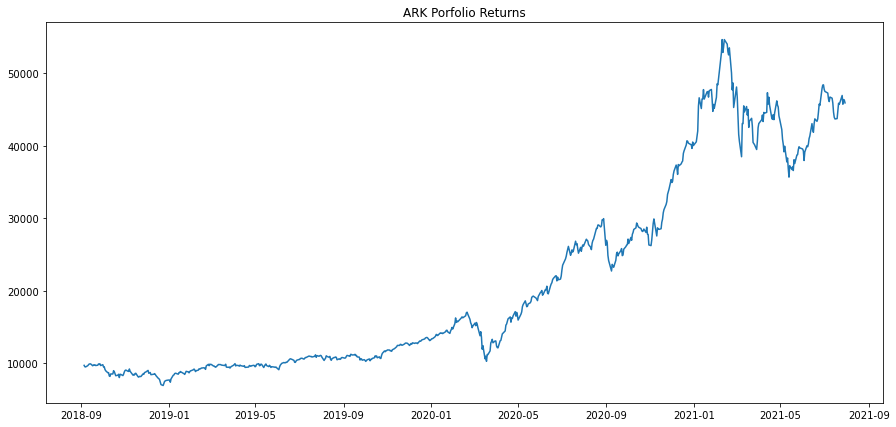

In [31]:
Initial_Investment = 10000
Cumulative_Profits = Initial_Investment * cumulative_returns
Cumulative_Profits_plot = Cumulative_Profits.plot(title="ARK Porfolio Returns", figsize=(15,7))

In [32]:
# to save ARK Portfolio Cumulative Profit plot

Cumulative_Profits_plot.get_figure().savefig("ARK_Porfolio_cumulative_profits_plot.png", bbox_inches="tight")

In [33]:
# MC_threeyear = MCSimulation(
#            portfolio_data = ARK_ETF_portfolio,
#            weights = [0.17, 0.08, 0.057, 0.11, 0.057, 0.043, 0.04, 0.0368, 0.0535, 0.0301, 0.0526, 0.048, 0.052, 0.043, 0.02, 0.082, 0.025],
#            num_simulation = 500,
#            num_trading_days = 252*3  
# )
# # Run a monte carlo to forecast 3 years cumulative returns
# MC_threeyear.portfolio_data.head()

# # Plot simulation outcomes
# MC_threeyear.calc_cumulative_return()

In [34]:
#Plot probability distribution and confidence intervals
MC_sim_line_plot = MC_threeyear.plot_simulation()

NameError: name 'MC_threeyear' is not defined

In [ ]:
MC_sim_line_plot.get_figure().savefig("MC_threeyyear_sim_plot.png", bbox_inches="tight")

In [ ]:
MC_distribution_plot = MC_threeyear.plot_distribution()

In [ ]:
MC_distribution_plot.get_figure().savefig("MC_threeyear_dist_plot.png", bbox_inches="tight")

In [ ]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_threeyear.simulated_return.mean(axis=1)),
    "median": list(MC_threeyear.simulated_return.median(axis=1)),
    "min": list(MC_threeyear.simulated_return.min(axis=1)),
    "max": list(MC_threeyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

In [ ]:
## saving Simulated Returns to a csv

df_simulated_returns.to_csv("Simulated_Returns")

In [ ]:
# Use the `plot` function to visually analyze the trajectory of ARK ETF daily returns on a 3 year trading day simulation
df_simulated_returns_plot = df_simulated_returns.plot(title="Simulated Daily Returns Behavior of ARK Stock Over the Next 3 Year")

In [ ]:
df_simulated_returns_plot.get_figure().savefig("ARK_ETF_daily_return_MC_threeyear_plot.png", bbox_inches="tight")

In [ ]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

In [ ]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl_plot = cumulative_pnl.plot(title="Simulated Outcomes Behavior of ARK ETF Over the Next 3 Year")

In [ ]:
cumulative_pnl_plot.get_figure().savefig("Simulated_Profits_threeyear_pnl_plot.png", bbox_inches="tight")

In [ ]:
tbl = MC_threeyear.summarize_cumulative_return()
print(tbl)

In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in AAPL stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next three years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

In [ ]:
#to create an interactive dashboard using interact

In [35]:
#needs to specify the stocks we want removed from the ARK dataframe, as well as the competitor stocks we want added. i.e. the swap needs to work
#with 4 dropdowns, 2 for stocks leaving ARK and 2 for stocks entering, and they need to occupy the same key in a key-value pair of weights
#(where the weights are the values) in a dictionary
@interact(swap = competitors_df, original = ARK_ETF)
def plot(original, swap):
    fig, ax = plt.subplots()
    # use ark-weight to get the list for the stock that tyhe user chose from the competitors_df
    weight = ARK_weight[competitors_df.index(swap)]
    # plot the baseline portfolio
    Initial_Investment = 10000
    Cumulative_Profits = Initial_Investment * cumulative_returns
    ax  = Cumulative_Profits.plot(title="ARK Porfolio Returns", figsize=(15,7), label="baseline")
    # now add the swap with the two dataframes
    tmp = pd.DataFrame()
    tmp = ARK_daily_returns.copy()
    tmp[swap] = Comp_daily_returns[swap]   
    tmp = tmp.drop(columns=[ARK_ETF[competitors_df.index(swap)]]) # swapping a stock from original ark ETF list with competitors list
    # print tmp.columns and len(ark_weight)
    mod_portfolio_returns = tmp.dot(ARK_weight)
    mod_cumulative_returns = (1 + mod_portfolio_returns).cumprod().dropna()
    mod_profits = Initial_Investment * mod_cumulative_returns
    mod_profits.plot(ax=ax, label="modified")
    ax.legend()
    plt.show()
    print("The original portfolio is made up of the following tickers: ")
    print(ARK_ETF)
    print("The new portfolio is made up of the following tickers: ")
    print(list(tmp.columns))
    del(tmp)

interactive(children=(Dropdown(description='original', options=('TSLA', 'ROKU', 'TDOC', 'MSTR', 'SQ', 'SHOP', …